In [1]:
# Importing the data
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plots
%matplotlib inline
sns.set()

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
data = pd.read_csv('Telcom Data.csv')

# Displaying the data
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Data Sample
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Dimensions of data
data.shape

(7043, 21)

In [5]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Decription about the data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Seems like most of the features are of 'object' type, so we need to convert them to integers or float.

# Data Preprocessing

In [7]:
# Checking for duplicated values
data.duplicated().sum()

0

No duplicated values, no treatment needed.

In [8]:
# Checking for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It seems there no null values, but it may happen to be there for object columns, so we may need cleaning.

In [9]:
# Checking for unique values in the features in the dataset
for i in data.columns:
  print('-'*25, i, '-'*25)
  print(set(data[i].tolist()))
  print()

------------------------- customerID -------------------------
{'5294-DMSFH', '5716-LIBJC', '8868-WOZGU', '5930-GBIWP', '6728-CZFEI', '9880-TDQAC', '8107-KNCIM', '6483-OATDN', '3278-FSIXX', '4636-JGAAI', '0674-EYYZV', '4720-VSTSI', '9588-OZDMQ', '5345-BMKWB', '7182-OVLBJ', '4937-QPZPO', '6741-EGCBI', '9371-BITHB', '2722-JMONI', '0354-VXMJC', '7188-CBBBA', '4238-HFHSN', '0961-ZWLVI', '6791-YBNAK', '3933-DQPWX', '7240-ETPTR', '0019-GFNTW', '2058-DCJBE', '8869-LIHMK', '3354-OADJP', '6402-EJMWF', '0667-NSRGI', '7266-GSSJX', '4860-IJUDE', '7228-PAQPD', '8565-WUXZU', '8393-DLHGA', '6086-ESGRL', '6510-UPNKS', '9397-TZSHA', '4378-MYPGO', '4818-QIUFN', '6543-XRMYR', '9365-CSLBQ', '4837-QUSFT', '3518-PZXZQ', '3312-UUMZW', '9540-JYROE', '2834-JKOOW', '0906-QVPMS', '5537-UXXVS', '5223-UZAVK', '2133-TSRRM', '8229-MYEJZ', '0420-TXVSG', '0604-THJFP', '1982-FEBTD', '5371-VYLSX', '7359-PTSXY', '7218-HKQFK', '4685-ERGHK', '1561-BWHIN', '3352-RICWQ', '6851-WEFYX', '7880-XSOJX', '8017-LXHFA', '6377-KSLXC'

Apart from Senior Citizen(Categorical feature), tenure and MonthlyCharges, all other features are Categorical and of 'object' type, except TotalCharges. So, TotalCharges must be converted into 'float' type.

In [10]:
data['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

As we can see above, there are 11 values having " " which can be considered as null. Treatment of these values are necessary as we see fit.

I am going to replace " " with the most frequent value, which is mode of the column.

In [11]:
# Finding mode of 'TotalCharges'
data['TotalCharges'].mode()

0        
1    20.2
Name: TotalCharges, dtype: object

Surprisingly, " " is also a mode of column "TotalCharges". But, we have to take the other one which is "20.2".

In [12]:
# Replacing " " with "20.2"
data['TotalCharges'] = data['TotalCharges'].replace(" ", "20.2")

In [13]:
# Verifying the change
data['TotalCharges'].value_counts()

TotalCharges
20.2      22
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

So, we have replaced all the " " with "20.2", now it's time to convert the column into a float type as it is a numerical column which determines total amount to be paid by a subscriber.

In [14]:
# Changing the type of column 'TotalCharges' to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [15]:
# Verifying the change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now the column, "customerID" is random unique value which would not contribute to EDA or Model Building. So, it is better to drop the column now.

In [16]:
# Dropping the column 'customerID'
data_1 = data.drop('customerID', axis=1)

# Data Sample
data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Since, the data is preprocessed, we are now ready to do some EDA(Exploratory Data Analysis) now.

# EDA - Exploratory Data Analysis

In [110]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.765853
std,0.368612,24.559481,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Distribution of values in the columns

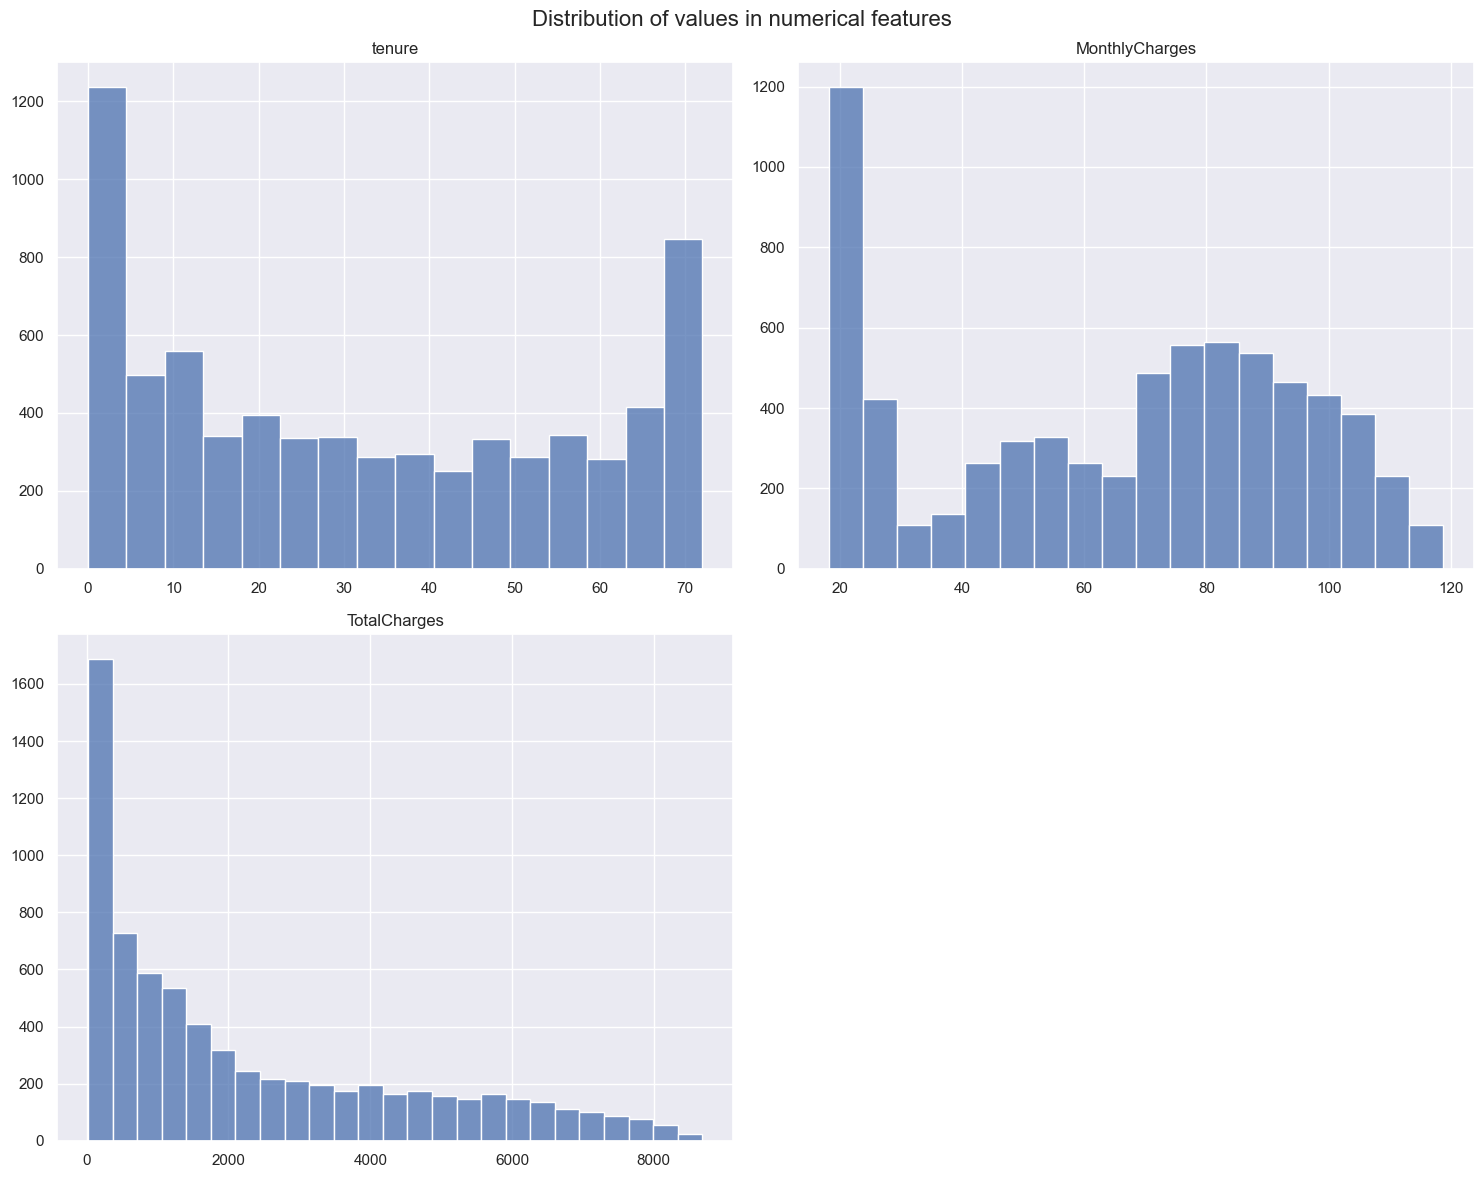

In [17]:
# Collecting numerical columns in one place
numerical_columns = data_1.select_dtypes(['int', 'float']).columns.tolist()
numerical_columns.remove('SeniorCitizen')

# Width and Height
num_of_histplots = len(numerical_columns)
n_rows_hist = int(np.ceil(num_of_histplots / 2))

# Setting up subplots and it's axes
histplots, axes_h = plt.subplots(n_rows_hist, 2, figsize=(15, 12))
histplots.suptitle('Distribution of values in numerical features', fontsize=16)
axes_h = axes_h.flatten()

# Creating histplots
for i in range(len(numerical_columns)):
  ax_h = sns.histplot(data=data_1, x=numerical_columns[i], ax=axes_h[i])
  ax_h.set_title(numerical_columns[i], fontsize=12)
  ax_h.set_xlabel('')
  ax_h.set_ylabel('')

# To remove empty axes in the plots
for j in range(len(numerical_columns), len(axes_h)):
  axes_h[j].axis('off')

# Setting the layout of the plot
plt.tight_layout()

# Saving the image
plt.savefig('images/Distribution_numerical_columns.png')

# Displaying the plot
plt.show()

As per the figure above, none of the distributions are standard normal distributions.


*   'tenure' has opposite of the bell shaped distribution, thus the oppposite ends have more customers.
*   'MonthlyCharges' somewhat looks like bell-shape but the maximum amount of customers are at start and a certain dip in customers, around 60-70.
*   As for 'TotalCharges', most customers were at the beginning and it decreased as the amount increased.





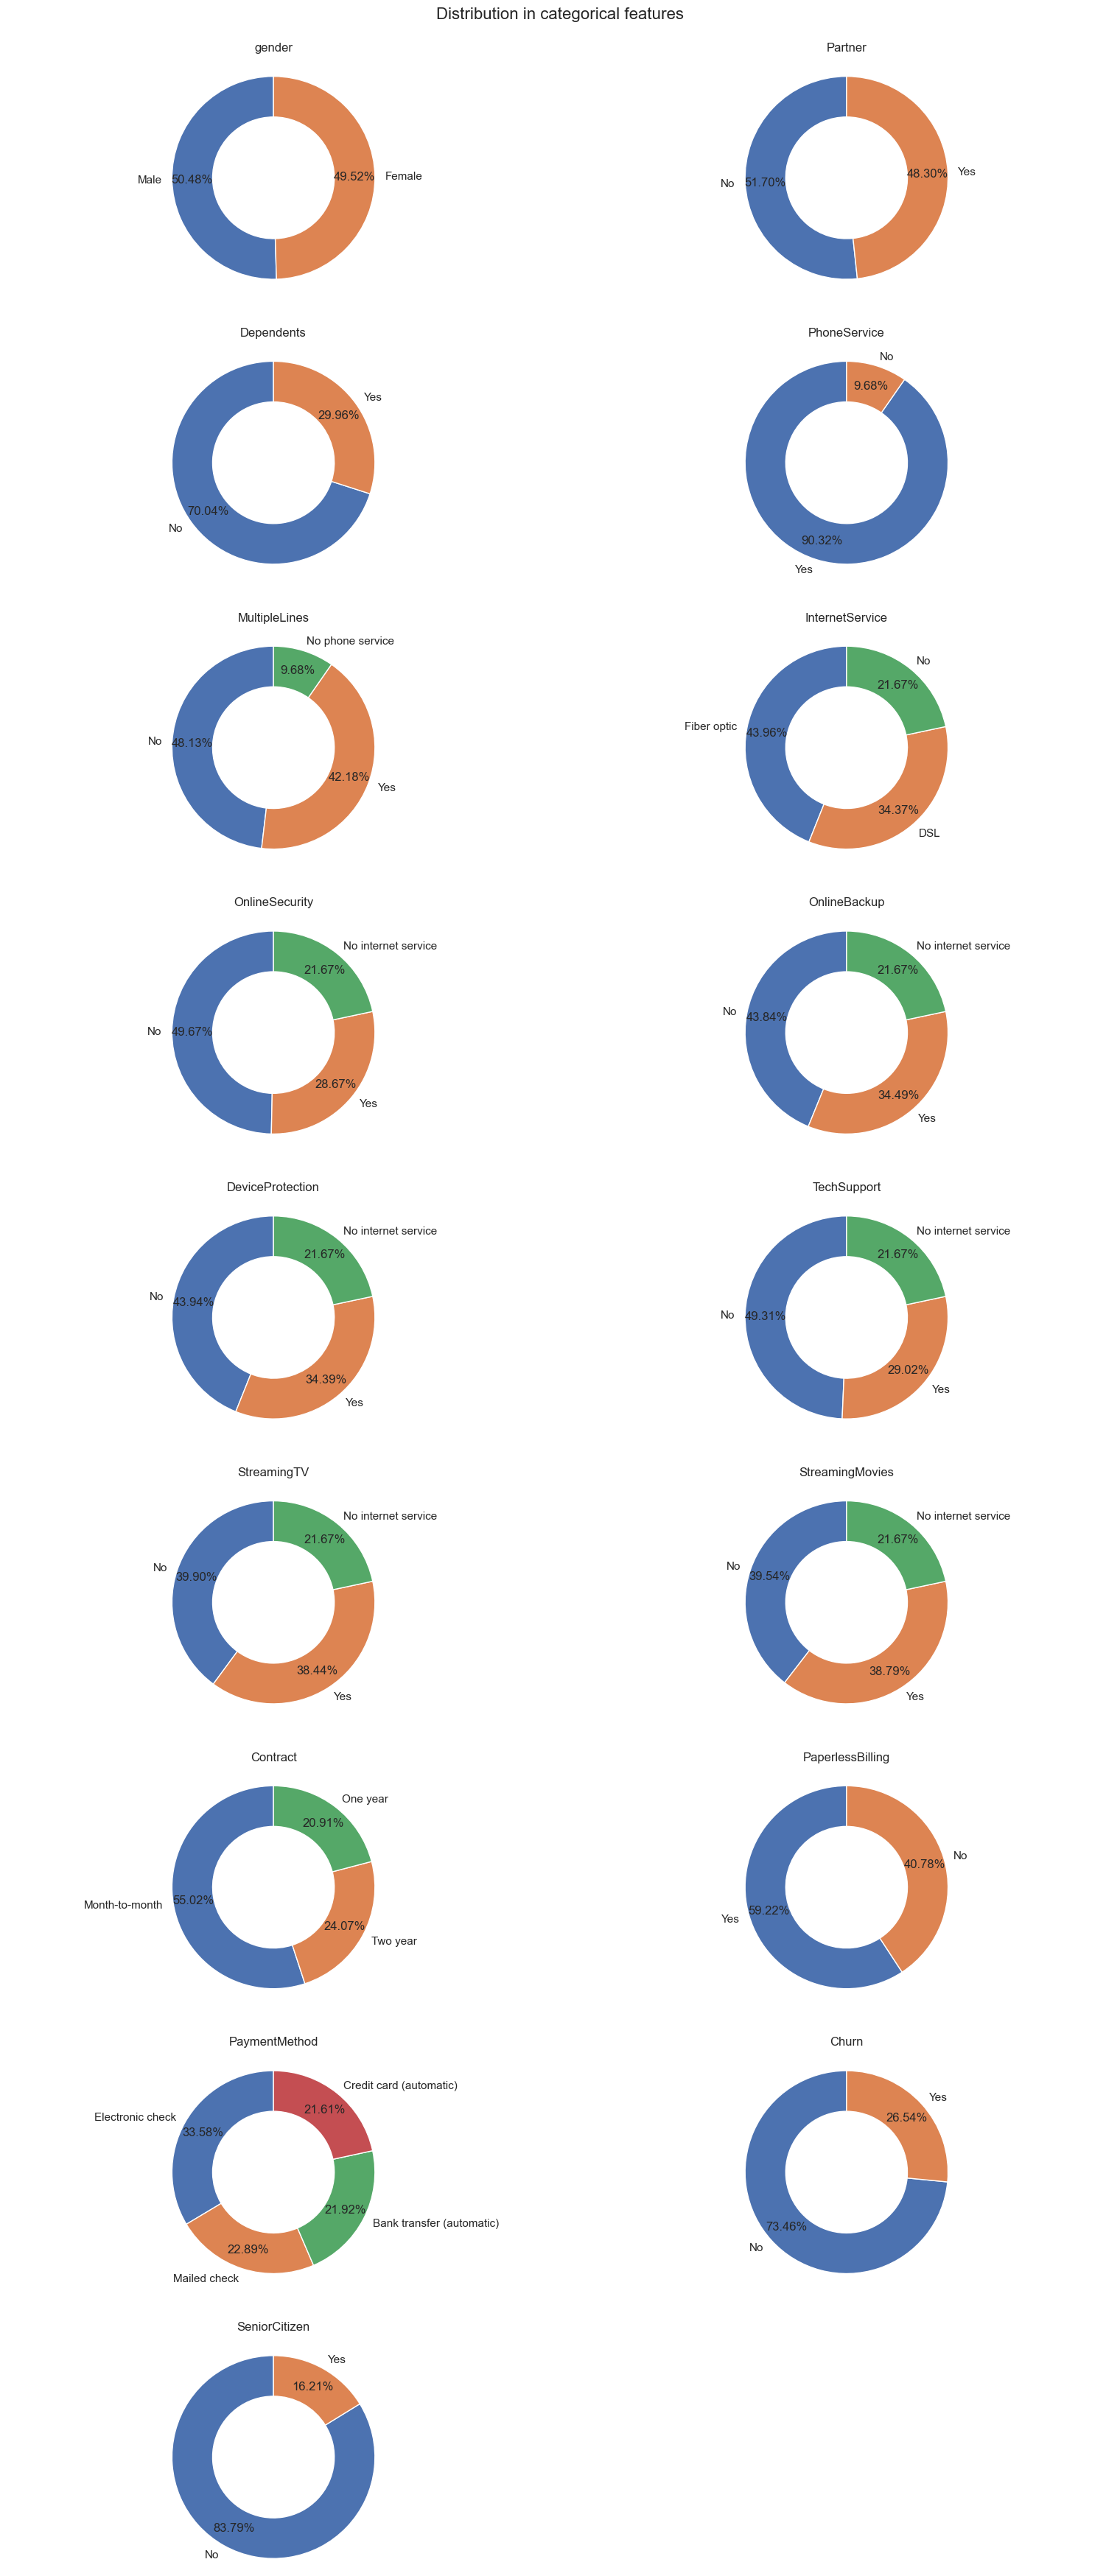

In [18]:
# Collecting categorical columns in one place
categorical_columns = data_1.select_dtypes(['object']).columns.tolist()
categorical_columns.append('SeniorCitizen')

# Set a style for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')

# Width and Height
num_of_piecharts = len(categorical_columns)
n_rows_pie = int(np.ceil(num_of_piecharts / 2))

# Setting up subplots and it's axes
piecharts, axes_p = plt.subplots(n_rows_pie, 2, figsize=(16, 4 * n_rows_pie))
piecharts.suptitle('Distribution in categorical features', fontsize=16)
axes_p = axes_p.flatten()

# Mapping for values for column 'SeniorCitizen'
map_seniorcitizen = {0: 'No', 1: 'Yes'}

# Creating piecharts
for i in range(len(categorical_columns)):
  value_counts = data_1[categorical_columns[i]].value_counts()

  if categorical_columns[i]=='SeniorCitizen':
    values = value_counts.index.map(map_seniorcitizen)
  else:
    values = value_counts.index

  axes_p[i].pie(value_counts, labels=values, autopct='%1.2f%%', startangle=90, pctdistance=0.8, wedgeprops=dict(width=0.4, edgecolor='w'))
  axes_p[i].set_title(categorical_columns[i], fontsize=12, pad=15)

  # Ensuring pie charts are circular
  axes_p[i].axis('equal')

# To remove empty axes in the plots
for j in range(len(categorical_columns), len(axes_p)):
  axes_p[j].axis('off')

# Setting the layout of the plot
plt.tight_layout(pad=3.0)

# Saving the image
plt.savefig('images/Distribution_categorical_columns.png', bbox_inches='tight')

# Displaying the plot
plt.show()

As per the above figure, most of the features either have Yes and No or Yes, No and No internet service.
  - In case of 'gender' is distribtuion is almost equal 50.48% male customers and 49.52% female customers, thus, we have almost equal mnumber of male and female customers.

  - While, 'Partner' also has equal distribution 48.30% have partners and 51.70% do not. While 70.04% do not have 'Dependents', while 29.96% have. So, 48.70% customers have partners but only 29.96% have dependents.

  - As for 'PhoneService', almost 90.32% of customers avail the phone services, while 9.68% do not.

  - As for 'MultipleLines', 48.13% do not have it, 42.18% have it and 9.68% have no phone service. And 'InternetSevice', 43.96% customers use FiberOptic, 34.37% use DSL and 21.67% do not use 'InternetService'.

  - For 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' and 'StreamingMovies' are divided into three categories Yes, No and No internet service. 21.67% have No internet service and among Yes and No divided fairly.

  - For 'Contract', 20.91% have One year contract, 24.07% have Two year contract and 55.02% have month-to-month contract.

  - 59.22% customers avail paperless billing and 40.78% do not avail it.

  - As for 'PaymentMethod', 33.58% use Electronic check, 22.89% use Mailed check, 21.92% use Bank transfer (automatic) and 21.61% use Credit card (automatic) to pay.

  - 26.54% have Churned and 73.46% have not.

  - Finally, 16.21% of customers are senior citizen while 83.79% are not.

In [107]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

## Relationship of 'Churn'(Target Variables) with other variables

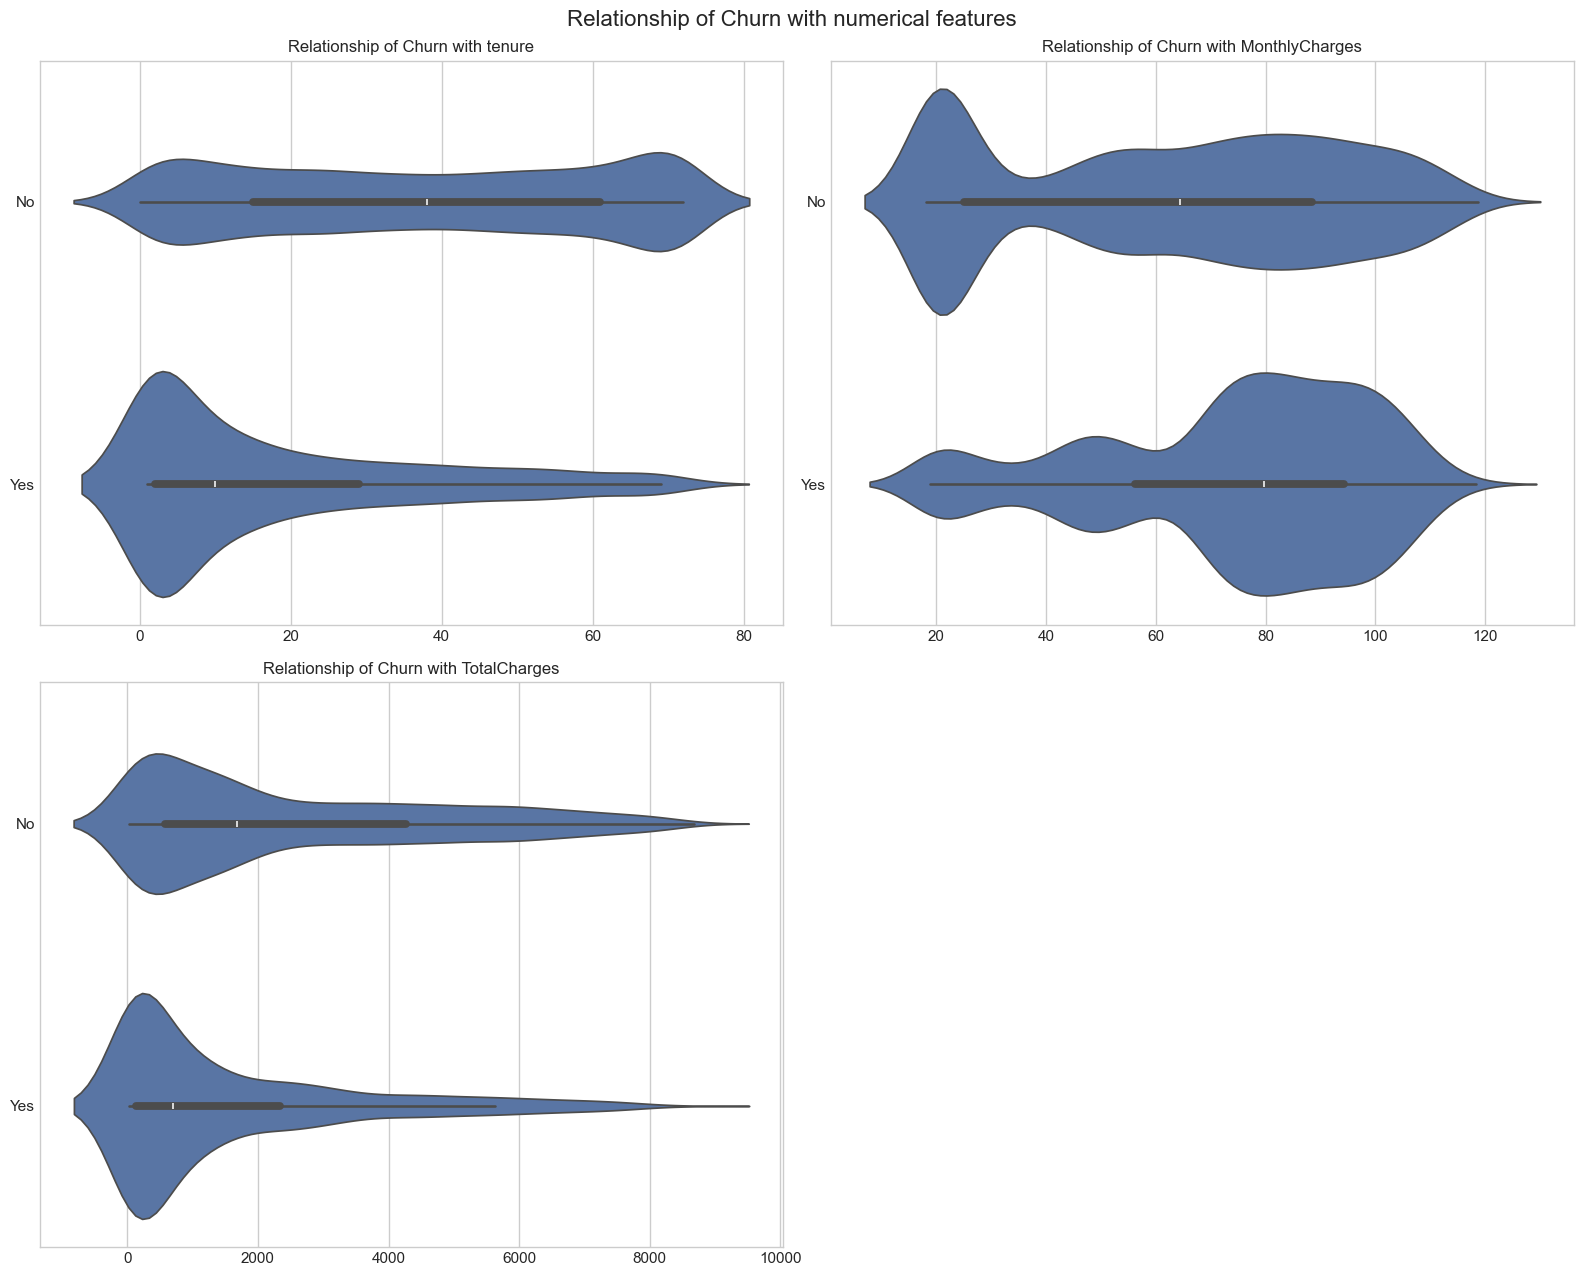

In [19]:
# Setting the Width and Height
num_of_violinplots = len(numerical_columns)
n_rows_violin = int(np.ceil(num_of_violinplots / 2))

# Setting up subplots aand it's axes
violinplots, axes_v = plt.subplots(n_rows_violin, 2, figsize=(16, 13))
violinplots.suptitle('Relationship of Churn with numerical features', fontsize=16)
axes_v = axes_v.flatten()

# Creating violinplots
for i in range(len(numerical_columns)):
  ax_v = sns.violinplot(data=data_1, x=numerical_columns[i], y='Churn', ax=axes_v[i])
  ax_v.set_title('Relationship of Churn with ' + numerical_columns[i], fontsize=12)
  ax_v.set_xlabel('')
  ax_v.set_ylabel('')

# To remove axes in the empty plots
for j in range(len(numerical_columns), len(axes_v)):
  axes_v[j].axis('off')

# Setting the layout of the plot
plt.tight_layout()

# Saving the image
plt.savefig('images/Rel_of_churn_with_numerical_columns.png')

# Displaying the plot
plt.show()

As per the above figure,
  - For 'tenure', customers who have not churned ranged from 0-80 equally, while most customers have values from 0-20 and 60-80. For customers who have churned 0-20.

  - As for 'MonthlyCharges', customers who have churned have monthly cahrges between 60-120. For customers who did not churn have most cutomers ranged between 60-100.

  - For 'TotalCharges', most customers who have or have not churned have monthly charges below 2000.

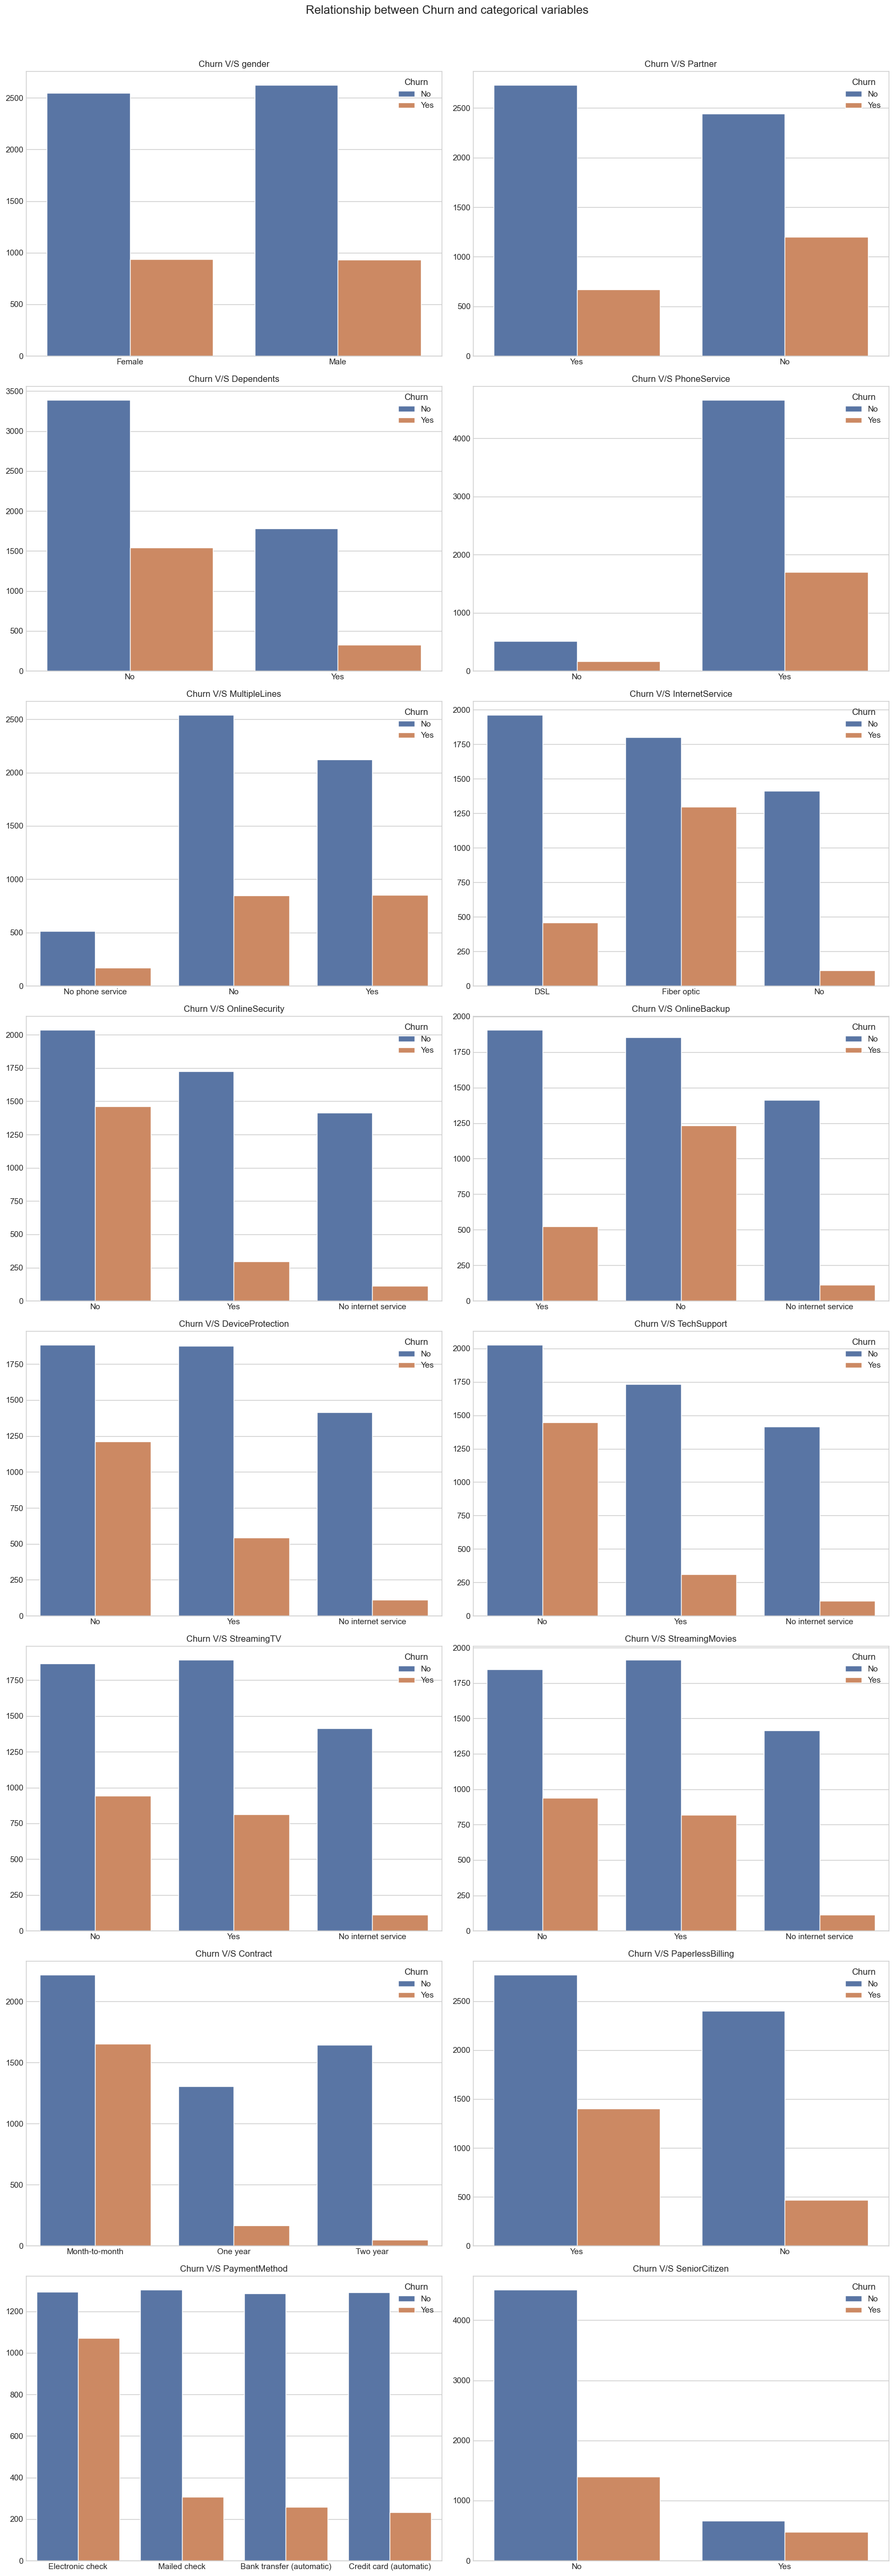

In [20]:
# Columns for the visualization
viz_prep_columns = categorical_columns
viz_prep_columns.remove('Churn')

# Setting Width and Height
num_of_countplots = len(viz_prep_columns)
n_rows_countplots = int(np.ceil(num_of_countplots / 2))

# Setting up subplots and it's axes
countplots, axes_c = plt.subplots(n_rows_countplots, 2, figsize=(17, 6 * n_rows_countplots))
countplots.suptitle('Relationship between Churn and categorical variables', fontsize=16, y=1.01)
axes_c = axes_c.flatten()

# Creating Countplots
for i in range(len(viz_prep_columns)):
  ax_c = sns.countplot(data=data_1, x=viz_prep_columns[i], hue='Churn', ax=axes_c[i])
  ax_c.set_title('Churn V/S ' + viz_prep_columns[i], fontsize=12)
  ax_c.set_xlabel('')
  ax_c.set_ylabel('')

  if categorical_columns[i]=='SeniorCitizen':
    ax_c.set_xticklabels(['No', 'Yes'])

# To remove axes in the empty plots
for j in range(len(viz_prep_columns), len(axes_c)):
  axes_c[j].axis('off')

# Setting the layout of the plot
plt.tight_layout()

# Saving the image
plt.savefig('images/Rel_of_Churn_with_cat_columns.png')

# Displaying the plot
plt.show()

From the figure above,

  - Number of customers who have churned or not churned is nearly same for both males and females.

  - Customers with partners have more people who have not churned, whereas people who have churned are more for customers with no partners.

  - Customers with Dependents have more churned and not churned customers.

  - Customers who have churned and not churned are more in customers
  who avail phone service.

  - Customers with no multiple lines have most customers who have not churned, customers who have churned are almost same for customers having multiple lines and not having multiple lines.

  - Customers who have DSL internet service have most customers who did not churn. Fibre optic category have most customers who have churned.

  - 'No' category in Online Security have most customers who have churned and did not churn.

  - 'Yes' category in Online Backup have most customers who did not churn. 'No' category have most cutomers who churned.

  - 'No' category in Device Protection have most customers who have and have not churned.

  - 'No' category in Tech Support have most customers who did and did not churn.

  - 'Yes' category in Streaming TV have most customers who did not churn. 'No' category in Streaming TV have most customers who did churn.

  - 'Yes' category in Streaming Movies have most customers who did not churn. Most number of customers who churned in 'No' category.

  - Most customers who churned and did not churn have month-to-month contract.

  - Most customers who churned and did not churn use paperless billing.

  - 'Mailed check' category in Payment Method have most customers who did not churn. 'Electronic check' have most customers who churned.

  - Most customers who churned and did not churn were not Senior Citizen.

## Correlation Matrices

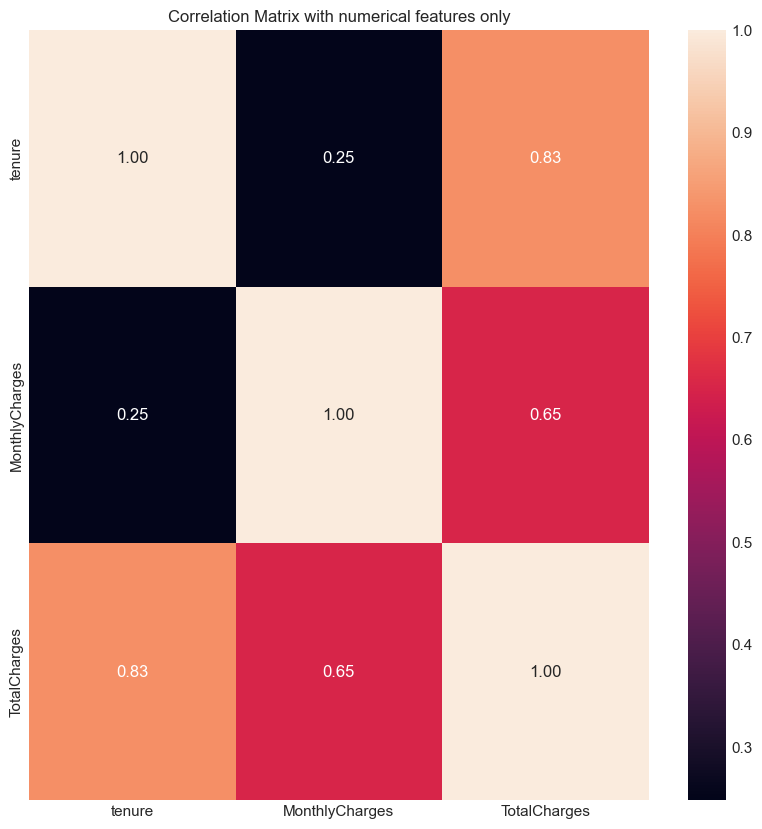

In [21]:
# Correlation Matrix with Numerical Columns
num_corr_matrix = data_1[numerical_columns].corr()

# Setting the matrix
plt.figure(figsize=(10, 10))
sns.heatmap(num_corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix with numerical features only')
plt.savefig('images/Num_Corr_Matrix.png')

# Displaying the matrix
plt.show()

In the Correlation Matrix, tenure and TotalCharges have a strong correlation of 0.83, which indicates multicollinearity.

In [22]:
from sklearn.preprocessing import OneHotEncoder

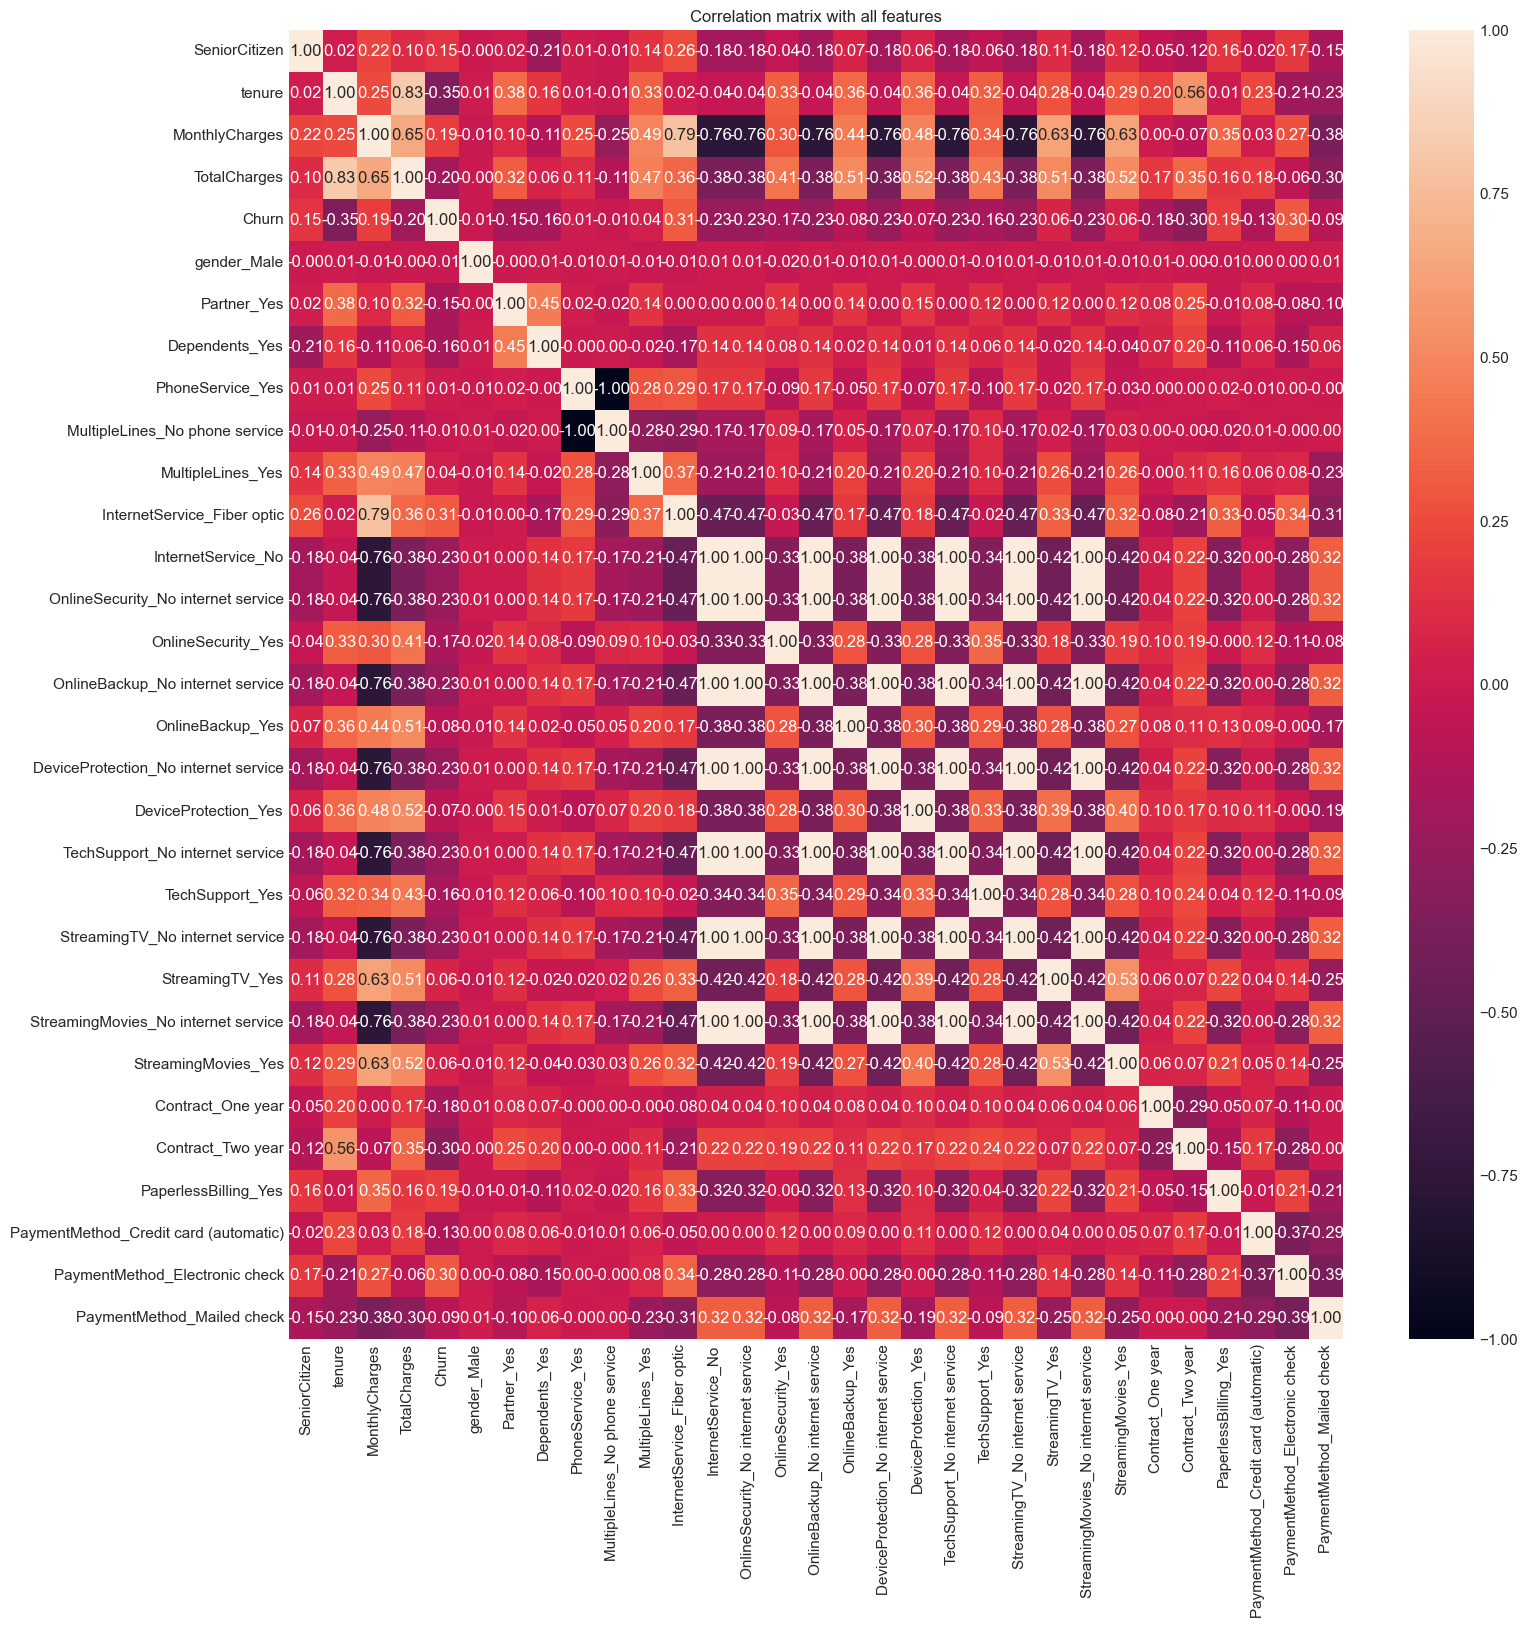

In [23]:
# Collecting the object columns for encoding
object_columns = data_1.select_dtypes('object').columns.tolist()
object_columns.remove('Churn')
non_object_data = data_1.drop(object_columns, axis=1)
non_object_data['Churn'] = data_1['Churn'].map({'No': 0, 'Yes': 1})
object_data = data_1[object_columns]

# Encoding the object columns
corr_encoder = OneHotEncoder(drop='first', sparse_output=False, dtype='int')
encoded_object_data = pd.DataFrame(corr_encoder.fit_transform(object_data), index=object_data.index, columns=corr_encoder.get_feature_names_out())

# Creating the Correlation matrix
data_corr = pd.concat([non_object_data, encoded_object_data], axis=1)
corr_matrix = data_corr.corr()

# Setting the matrix
plt.figure(figsize=(17, 17))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation matrix with all features')
plt.savefig('images/Corr_Matrix_all_features.png')

# Displaying the matrix
plt.show()

# Dependency Split and Train-Test Split

In [24]:
x = data_1.drop('Churn', axis=1)
y = data_1['Churn']

# Shape of the data
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


In [25]:
# Sample Data of x
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [26]:
# Sample Data of y
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [27]:
# Checking the percentage of people who have churned and did not churn
round(y.value_counts(normalize=True) * 100, 2)

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the data into Training and Testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=38)

# Shape of Data
print('---', 'Training Data', '---')
print(x_train.shape)
print(y_train.shape)
print('\n---', 'Testing Data', '---')
print(x_test.shape)
print(y_test.shape)

--- Training Data ---
(5634, 19)
(5634,)

--- Testing Data ---
(1409, 19)
(1409,)


In [29]:
# Training Data Sample
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2911,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),73.50,73.50
5498,Female,1,Yes,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,46.00,46.00
1229,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),75.35,4729.30
5151,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.35,35.10
6052,Female,0,Yes,Yes,41,Yes,No,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Electronic check,78.45,3126.45


In [30]:
# Testing Data Sample
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3762,Male,0,No,No,15,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,49.00,749.25
2412,Female,0,Yes,No,42,No,No phone service,DSL,No,Yes,No,Yes,No,No,One year,No,Mailed check,33.55,1445.30
6353,Male,0,Yes,No,10,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),54.95,568.85
1510,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),80.40,5727.15
5671,Female,0,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.30,1554.90


In [31]:
# Checking the percentage of customers churned and did not churn in Training and Testing Data
print(':::Training Data:::')
print(round(y_train.value_counts(normalize=True) * 100, 2))
print()
print(':::Testing Data:::')
print(round(y_test.value_counts(normalize=True) * 100, 2))

:::Training Data:::
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

:::Testing Data:::
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


# Encoding and Scaling the data

In [32]:
# Encoding the y data in the training and testing
y_test = y_test.map({'No': 0, 'Yes': 1})
y_train = y_train.map({'No': 0, 'Yes': 1})

In [33]:
# Checking the data
print("TRAINING DATA:")
print(y_train.head())
print()
print("TESTING DATA:")
print(y_test.head())

TRAINING DATA:
2911    1
5498    1
1229    0
5151    0
6052    0
Name: Churn, dtype: int64

TESTING DATA:
3762    0
2412    1
6353    0
1510    0
5671    0
Name: Churn, dtype: int64


In [ ]:
# Collecting the columns
columns_to_encode = x_train.select_dtypes('object').columns.tolist()

# Encoding the training data
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype='int')
encoded_training_data = pd.DataFrame(encoder.fit_transform(x_train[columns_to_encode]), index=x_train.index, columns=encoder.get_feature_names_out())

# Scaling the Training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_training_data = pd.DataFrame(scaler.fit_transform(x_train.drop(columns_to_encode, axis=1)), index=x_train.index, columns=scaler.get_feature_names_out())
scaled_training_data = scaled_training_data.drop('SeniorCitizen', axis=1)

# Combining all the data together
x_train_final = pd.concat([scaled_training_data, x_train['SeniorCitizen'], encoded_training_data], axis=1)

# Training Data Sample
x_train_final.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2911,-1.271021,0.294070,-0.971094,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5498,-1.271021,-0.622139,-0.983268,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1229,1.166563,0.355705,1.089921,0,1,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
5151,-1.230394,-1.476712,-0.988093,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
6052,0.354035,0.458987,0.380376,0,0,1,1,1,0,0,...,0,1,0,1,0,1,0,0,1,0


In [35]:
# Details of the data before oversampling
print('Size of the Data:')
print('X_train:', x_train_final.shape)
print('Y_train:', y_train.shape)

print('\n')

print('Value distribution:')
print(y_train.value_counts())
print()
print(round(y_train.value_counts(normalize=True) * 100, 2))

Size of the Data:
X_train: (5634, 30)
Y_train: (5634,)


Value distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [36]:
# Oversampling the training data
from imblearn.over_sampling import SMOTE, SMOTENC
cat_columns_for_smote = encoder.get_feature_names_out().tolist()
cat_columns_for_smote.append('SeniorCitizen')
cat_cols_indices_smote = [x_train_final.columns.get_loc(col) for col in cat_columns_for_smote]
# resampler_basic = SMOTE(random_state=36)
resampler = SMOTENC(categorical_features=cat_cols_indices_smote, random_state=36)
x_train_smote, y_train_smote = resampler.fit_resample(x_train_final, y_train)

In [37]:
# Details of the data after oversampling
print('Size of the Data:')
print('X_train:', x_train_smote.shape)
print('Y_train:', y_train_smote.shape)

print('\n')

print('Value distribution:')
print(y_train_smote.value_counts())
print()
print(round(y_train_smote.value_counts(normalize=True) * 100, 2))

Size of the Data:
X_train: (8278, 30)
Y_train: (8278,)


Value distribution:
Churn
1    4139
0    4139
Name: count, dtype: int64

Churn
1    50.0
0    50.0
Name: proportion, dtype: float64


In [38]:
# Encoding the Testing Data
encoded_testing_data = pd.DataFrame(encoder.transform(x_test[columns_to_encode]), index=x_test.index, columns=encoder.get_feature_names_out())

# Scaling the Testing data
scaled_testing_data = pd.DataFrame(scaler.transform(x_test.drop(columns_to_encode, axis=1)), index=x_test.index, columns=scaler.get_feature_names_out())
scaled_testing_data = scaled_testing_data.drop('SeniorCitizen', axis=1)

# Combining all the data together
x_test_final = pd.concat([scaled_testing_data, x_test['SeniorCitizen'], encoded_testing_data], axis=1)

# Testing Data Sample
x_test_final.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3762,-0.702251,-0.522189,-0.671955,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
2412,0.394662,-1.036931,-0.363830,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
6353,-0.905383,-0.323955,-0.751814,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1510,1.572827,0.523955,1.531646,0,1,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
5671,1.166563,-1.311794,-0.315313,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0


# Model Building

In [39]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [40]:
# Models

# Logistic Regression
logit_model = LogisticRegression()
logit_model.fit(x_train_final, y_train)
logit_train_score = logit_model.score(x_train_final, y_train)
y_pred_logit = logit_model.predict(x_test_final)

# Stochastic Gradient Descent
sgd_model = SGDClassifier(random_state=52)
sgd_model.fit(x_train_final, y_train)
sgd_train_score = sgd_model.score(x_train_final, y_train)
y_pred_sgd = sgd_model.predict(x_test_final)

# Decision Tree Classifier
dtree_model = DecisionTreeClassifier(random_state=45)
dtree_model.fit(x_train_final, y_train)
dtree_train_score = dtree_model.score(x_train_final, y_train)
y_pred_dtree = dtree_model.predict(x_test_final)

# Random Forest Classifier
rfc_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rfc_model.fit(x_train_final, y_train)
rfc_train_score = rfc_model.score(x_train_final, y_train)
y_pred_rfc = rfc_model.predict(x_test_final)

# Ada Boost Classifier
ada_model = AdaBoostClassifier(random_state=40)
ada_model.fit(x_train_final, y_train)
ada_train_score = ada_model.score(x_train_final, y_train)
y_pred_ada = ada_model.predict(x_test_final)

# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=41)
gbc_model.fit(x_train_final, y_train)
gbc_train_score = gbc_model.score(x_train_final, y_train)
y_pred_gbc = gbc_model.predict(x_test_final)

# LGBM Classifer
lgbm_model = LGBMClassifier(n_jobs=-1, random_state=49)
lgbm_model.fit(x_train_final, y_train)
lgbm_train_score = lgbm_model.score(x_train_final, y_train)
y_pred_lgbm = lgbm_model.predict(x_test_final)

# XG Boost Classifier
xgb_model = XGBClassifier(n_jobs=-1, random_state=52)
xgb_model.fit(x_train_final, y_train)
xgb_train_score = xgb_model.score(x_train_final, y_train)
y_pred_xgb = xgb_model.predict(x_test_final)

# Support Vector Classifier
svc_model = SVC(random_state=46)
svc_model.fit(x_train_final, y_train)
svc_train_score = svc_model.score(x_train_final, y_train)
y_pred_svc = svc_model.predict(x_test_final)

# Linear Support Vector Classifier
lsvc_model = LinearSVC(random_state=44)
lsvc_model.fit(x_train_final, y_train)
lsvc_train_score = lsvc_model.score(x_train_final, y_train)
y_pred_lsvc = lsvc_model.predict(x_test_final)

# K Neighbors Classifier
knc_model = KNeighborsClassifier(n_jobs=-1)
knc_model.fit(x_train_final, y_train)
knc_train_score = knc_model.score(x_train_final, y_train)
y_pred_knc = knc_model.predict(x_test_final)

# Gaussian NB
gnb_model = GaussianNB()
gnb_model.fit(x_train_final, y_train)
gnb_train_score = gnb_model.score(x_train_final, y_train)
y_pred_gnb = gnb_model.predict(x_test_final)

# Bernoulli NB
bnb_model = BernoulliNB()
bnb_model.fit(x_train_final, y_train)
bnb_train_score = bnb_model.score(x_train_final, y_train)
y_pred_bnb = bnb_model.predict(x_test_final)

# Voting Classifier
voting_list = [('Logistic Regression', logit_model), ('SGD Classifier', sgd_model), ('Decision Tree', dtree_model),
               ('Random Forest', rfc_model), ('Ada Boost Classifier', ada_model), ('Gradient Boosting', gbc_model), 
               ('LightGBM', lgbm_model), ('XGBoost', xgb_model), ('Support Vector Machine', svc_model), 
               ('Linear SVC', lsvc_model), ('K Neighbors Classifier', knc_model), ('Gaussian NB', gnb_model), 
               ('Bernoulli NB', bnb_model)]
voting_model = VotingClassifier(voting_list, n_jobs=-1)
voting_model.fit(x_train_final, y_train)
voting_train_score = voting_model.score(x_train_final, y_train)
y_pred_voting = voting_model.predict(x_test_final)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


  File "c:\Users\Twarit\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Twarit\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Twarit\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Twarit\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


# Metric Evaluation

In [41]:
from sklearn.metrics import classification_report, accuracy_score

In [42]:
# Test scores
logit_test_score = accuracy_score(y_test, y_pred_logit)
sgd_test_score = accuracy_score(y_test, y_pred_sgd)
dtree_test_score = accuracy_score(y_test, y_pred_dtree)
rfc_test_score = accuracy_score(y_test, y_pred_rfc)
ada_test_score = accuracy_score(y_test, y_pred_ada)
gbc_test_score = accuracy_score(y_test, y_pred_ada)
lgbm_test_score = accuracy_score(y_test, y_pred_lgbm)
xgb_test_score = accuracy_score(y_test, y_pred_xgb)
svc_test_score = accuracy_score(y_test, y_pred_svc)
lsvc_test_score = accuracy_score(y_test, y_pred_lsvc)
knc_test_score = accuracy_score(y_test, y_pred_knc)
gnb_test_score = accuracy_score(y_test, y_pred_gnb)
bnb_test_score = accuracy_score(y_test, y_pred_bnb)
voting_test_score = accuracy_score(y_test, y_pred_voting)

# Collecting Training and Testing scores and Model names
models = ['Logistic Regression', 'SGD Classifier', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'LightGBM', 'XGBoost',
          'Support Vector Machine', 'Linear SVC', 'K Neighbors Classifier', 'Gaussian NB', 'Bernoulli NB', 'Voting Classifier']
training_scores = [logit_train_score, sgd_train_score, dtree_train_score, rfc_train_score, ada_train_score, gbc_train_score, lgbm_train_score,
                   xgb_train_score, svc_train_score, lsvc_train_score, knc_train_score, gnb_train_score, bnb_train_score, voting_train_score]
testing_scores = [logit_test_score, sgd_test_score, dtree_test_score, rfc_test_score, ada_test_score, gbc_test_score, lgbm_test_score,
                  xgb_test_score, svc_test_score, lsvc_test_score, knc_test_score, gnb_test_score, bnb_test_score, voting_test_score]

dict_scores_1 = {'Models': models, 'Training Scores': training_scores, 'Testing Scores': testing_scores}
dict_scores_2 = {'Models': models, 'Training Scores': [round(train_score * 100, 2) for train_score in training_scores],
                 'Testing Scores': [round(test_score * 100, 2) for test_score in testing_scores]}

scores_data_1 = pd.DataFrame(dict_scores_1)
scores_data_2 = pd.DataFrame(dict_scores_2)

# Displaying the scores
scores_data_2

,Models,Training Scores,Testing Scores
0,Logistic Regression,80.53,80.41
1,SGD Classifier,78.59,77.43
2,Decision Tree,99.82,73.53
3,Random Forest,99.82,77.22
4,Ada Boost,81.13,80.13
5,Gradient Boosting,82.78,80.13
6,LightGBM,88.43,78.50
7,XGBoost,93.84,77.71
8,Support Vector Machine,81.58,79.56
9,Linear SVC,80.28,80.48


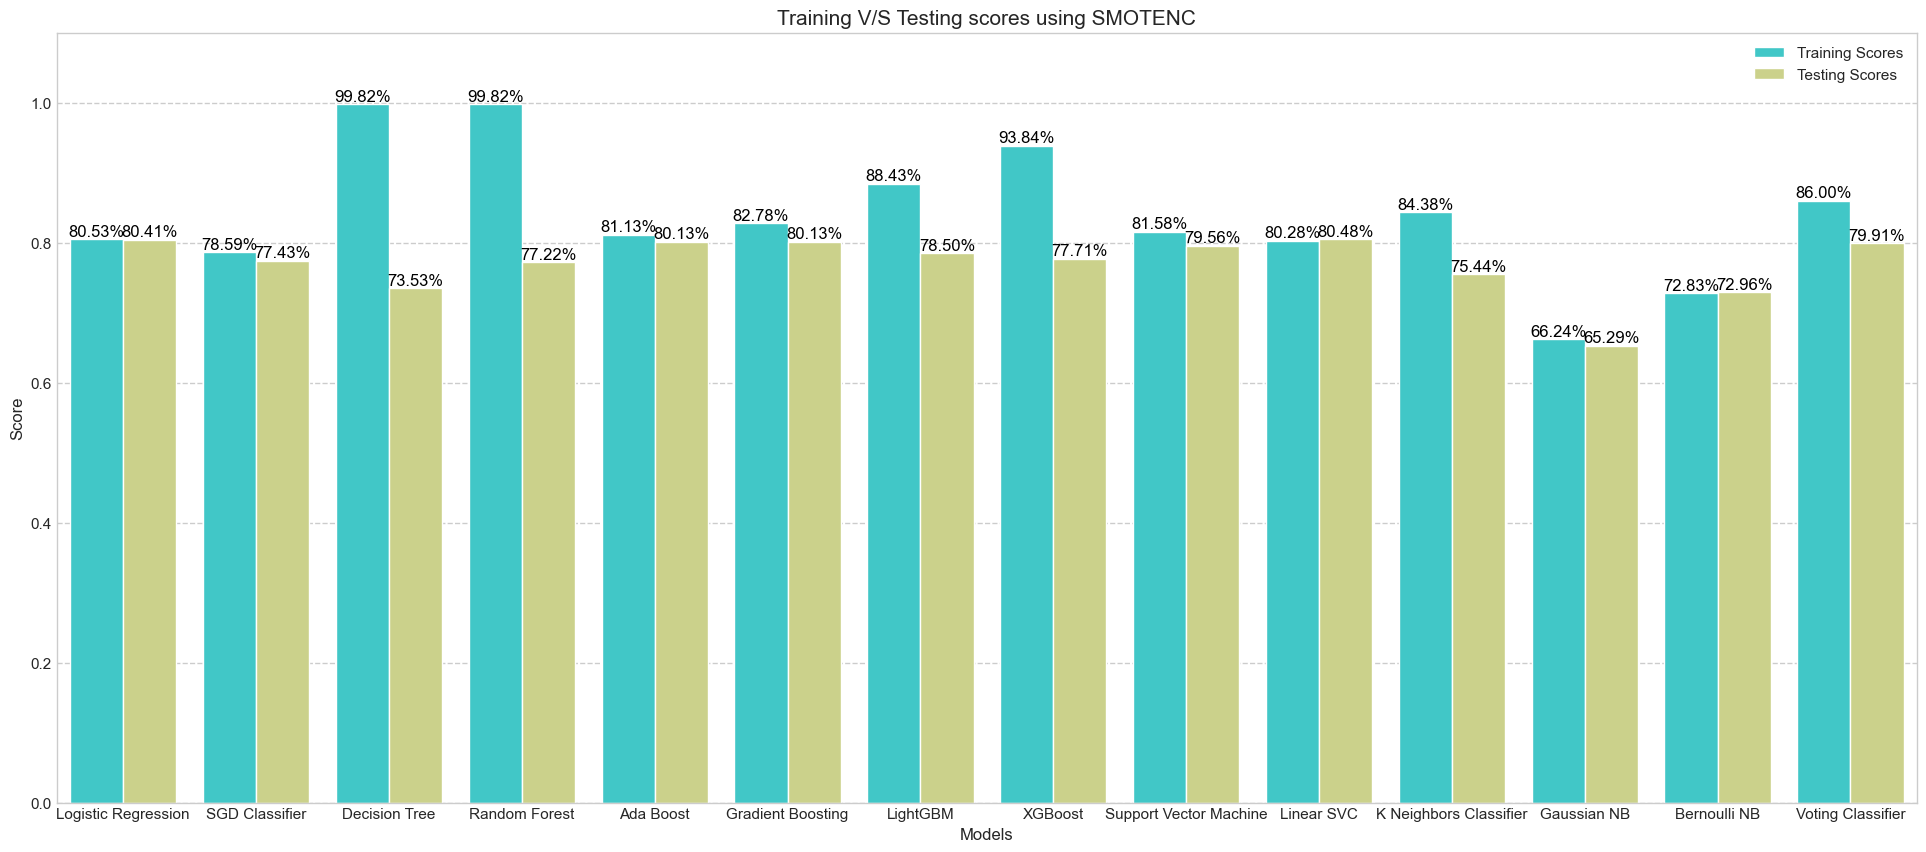

In [43]:
# Melting the scores
melted_scores = scores_data_1.melt('Models', var_name='Score_Type', value_name='Score')

# Creating a barplot
plt.figure(figsize=(24, 10))
sns.barplot(data=melted_scores, x='Models', y='Score', hue='Score_Type', palette='rainbow')

# Adding title and labels
plt.title('Training V/S Testing scores using SMOTENC', fontsize=15)
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--')

# Adding percentage scores above bars
ax = plt.gca()
for p in ax.patches:
  if p.get_height() > 0:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            f'{p.get_height()*100:.2f}%',
            color='black',
            ha='center',
            va='bottom')

# Adding legend and plotting the barplot
plt.legend()
plt.savefig('images/Training_and_Testing_scores_only_SMOTE.png')
plt.show()

In [44]:
# Classification reports for the models
predictions = [y_pred_logit, y_pred_sgd, y_pred_dtree, y_pred_rfc, y_pred_ada, y_pred_gbc, y_pred_lgbm, y_pred_xgb, y_pred_svc, y_pred_lsvc,
               y_pred_knc, y_pred_gnb, y_pred_bnb, y_pred_voting]
models_predictions = zip(models, predictions)
print('*'*15, 'CLASSIFICATION REPORT', '*'*15)
print('\n')

for name, prediction in models_predictions:
  print('-'*14, name, '-'*14)
  print(classification_report(y_test, prediction))
  print('_' * 53)

*************** CLASSIFICATION REPORT ***************


-------------- Logistic Regression --------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

_____________________________________________________
-------------- SGD Classifier --------------
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1035
           1       0.68      0.29      0.40       374

    accuracy                           0.77      1409
   macro avg       0.73      0.62      0.63      1409
weighted avg       0.76      0.77      0.74      1409

_____________________________________________________
-------------- Decision Tree --------------
              precision    recall  f1-score

# Hyperparameter Tuning using Bayesian Optimisation

In [45]:
from skopt import BayesSearchCV, gp_minimize
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import cross_val_score

In [46]:
scorers = {
    'F1': 'f1',
    'Recall': 'recall',
    'Accuracy': 'accuracy'
}

## Decision Tree Classifier

In [47]:
# Setting up the Parameters
dtree_space = {
    'max_depth': Integer(5, 15),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.5, 1.0, prior='uniform'),
    'criterion': Categorical(['gini', 'entropy'])
}

# Tuning the model using Bayesian Optimisation
dtree_bayes_search = BayesSearchCV(
    estimator=dtree_model,
    search_spaces=dtree_space,
    scoring=scorers,
    refit='Recall',
    n_jobs=-1,
    cv=5,
    n_iter=100,
    return_train_score=True,
    random_state=45
)

# Fitting the data
dtree_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45),
              n_iter=100, n_jobs=-1, random_state=45, refit='Recall',
              return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=5, high=15, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.5, high=1.0, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [48]:
# Best parameters
dtree_bayes_search.best_params_

OrderedDict([('criterion', 'gini'),
             ('max_depth', 9),
             ('max_features', 0.5001945582439266),
             ('min_samples_leaf', 1),
             ('min_samples_split', 8)])

In [49]:
# Results
results_dtree = pd.DataFrame(dtree_bayes_search.cv_results_)
dtree_df_scores = results_dtree.sort_values('rank_test_F1').head()

# Displaying the scores
dtree_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
79,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.810855,0.854329,0.802011
84,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.810855,0.854329,0.802011
97,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.810781,0.854329,0.802011
29,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.810536,0.854809,0.802132
58,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.809951,0.853602,0.801528


In [50]:
# Storing the best model
tuned_dtree_best = dtree_bayes_search.best_estimator_

# Prediction
y_pred_dtree_tuned = tuned_dtree_best.predict(x_test_final)

In [51]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_dtree))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_dtree_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1035
           1       0.50      0.53      0.52       374

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1035
           1       0.50      0.73      0.59       374

    accuracy                           0.73      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.73      0.74      1409



## Random Forest Classifier 

In [52]:
# Setting up the Parameters
rfc_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(10, 25),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Real(0.5, 0.9, prior='uniform'),
    'criterion': Categorical(['gini', 'entropy'])
}

# Tuning the model using Bayesian Optimisation
rfc_bayes_search = BayesSearchCV(
    estimator=rfc_model,
    search_spaces=rfc_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=5,
    n_iter=50,
    return_train_score=True,
    random_state=42
)

# Fitting the data
rfc_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=5,
              estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
              n_jobs=-1, random_state=42, refit='F1', return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'max_depth': Integer(low=10, high=25, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.5, high=0.9, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=500, prior='uniform', transform='normalize')})

In [53]:
# Best parameters
rfc_bayes_search.best_params_

OrderedDict([('criterion', 'entropy'),
             ('max_depth', 23),
             ('max_features', 0.5),
             ('min_samples_leaf', 5),
             ('n_estimators', 100)])

In [54]:
# Results
results_rfc = pd.DataFrame(rfc_bayes_search.cv_results_)
rfc_df_scores = results_rfc.sort_values('rank_test_F1').head()

# Displaying the scores
rfc_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
28,"{'criterion': 'entropy', 'max_depth': 23, 'max...",0.839413,0.867135,0.836200
45,"{'criterion': 'entropy', 'max_depth': 16, 'max...",0.838962,0.866409,0.835596
19,"{'criterion': 'entropy', 'max_depth': 25, 'max...",0.838139,0.864718,0.834992
27,"{'criterion': 'entropy', 'max_depth': 23, 'max...",0.838120,0.864476,0.834992
18,"{'criterion': 'entropy', 'max_depth': 25, 'max...",0.837578,0.865686,0.834267


In [55]:
# Storing the best model
tuned_rfc_best = rfc_bayes_search.best_estimator_

# Prediction
y_pred_rfc_tuned = tuned_rfc_best.predict(x_test_final)

In [56]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_rfc))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_rfc_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.59      0.44      0.51       374

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.57      0.67      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



## Light GBM Classifier

In [57]:
# Setting up the Parameters
lgbm_space = {
    'n_estimators': Integer(100, 3000),
    'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
    'num_leaves': Integer(20, 128),
    'max_depth': Integer(3, 12),
    'min_child_samples': Integer(20, 100),
    'subsample': Real(0.6, 1.0, prior='uniform'),
    'colsample_bytree': Real(0.6, 1.0, prior='uniform'),
    'reg_alpha': Real(1e-8, 10.0, prior='log-uniform'),
    'reg_lambda': Real(1e-8, 10.0, prior='log-uniform'),
    'min_split_gain': Real(0.0, 0.1, prior='uniform')
}

# Tuning the model using Bayesian Optimisation
lgbm_bayes_search = BayesSearchCV(
    estimator=lgbm_model,
    search_spaces=lgbm_space,
    scoring=scorers,
    refit='Recall',
    n_jobs=-1,
    cv=5,
    n_iter=30,
    return_train_score=True,
    random_state=49
)

# Fitting the data
lgbm_bayes_search.fit(x_train_smote, y_train_smote)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

BayesSearchCV(cv=5, estimator=LGBMClassifier(n_jobs=-1, random_state=49),
              n_iter=30, n_jobs=-1, random_state=49, refit='Recall',
              return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'colsample_bytree': Real(low=0.6, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.5, prior='log...
                             'n_estimators': Integer(low=100, high=3000, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=20, high=128, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=1e-08, high=10.0, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-08, high=10.0, prior='log-uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

In [58]:
# Best parameters
lgbm_bayes_search.best_params_

OrderedDict([('colsample_bytree', 0.7158483175679613),
             ('learning_rate', 0.023774172853490733),
             ('max_depth', 12),
             ('min_child_samples', 60),
             ('min_split_gain', 0.005576608006809304),
             ('n_estimators', 516),
             ('num_leaves', 107),
             ('reg_alpha', 0.0007889549423748391),
             ('reg_lambda', 7.133666084089261e-05),
             ('subsample', 0.6727485289066056)])

In [59]:
# Results
results_lgbm = pd.DataFrame(lgbm_bayes_search.cv_results_)
lgbm_df_scores = results_lgbm.sort_values('rank_test_F1').head()

# Displaying the scores
lgbm_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
3,"{'colsample_bytree': 0.7158483175679613, 'lear...",0.835760,0.858682,0.834631
4,"{'colsample_bytree': 0.987351273359239, 'learn...",0.834455,0.849749,0.837654
29,"{'colsample_bytree': 0.8524569139322262, 'lear...",0.833768,0.850468,0.834511
26,"{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.833235,0.848299,0.836084
14,"{'colsample_bytree': 0.9158883963963538, 'lear...",0.832877,0.850712,0.834391


In [60]:
# Storing the best model
tuned_lgbm_best = lgbm_bayes_search.best_estimator_

# Prediction
y_pred_lgbm_tuned = tuned_lgbm_best.predict(x_test_final)

In [61]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_lgbm))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_lgbm_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.71      1409
weighted avg       0.77      0.78      0.78      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



## XG Boost Classifier

In [62]:
# Setting up the Parameters
xgb_space = {
    'learning_rate': Real(0.01, 0.5, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'min_child_weight': Integer(1, 50),
    'gamma': Real(1e-8, 5.0, prior='uniform'),
    'subsample': Real(0.6, 1.0, prior='uniform'),
    'colsample_bytree': Real(0.6, 1.0, prior='uniform'),
    'reg_alpha': Real(1e-8, 10.0, prior='log-uniform'),
    'reg_lambda': Real(1e-8, 10.0, prior='log-uniform')
}

# Tuning the model using Bayesian Optimisation
xgb_bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=xgb_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=5,
    n_iter=30,
    return_train_score=True,
    random_state=49
)

# Fitting the data
xgb_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=None...
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=1e-08, high=10.0, prior='log-uniform', transform='normalize'),
                             'reg_lambda': Real(low=1e-08, high=10.0, prior='log-uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

In [63]:
# Best parameters
xgb_bayes_search.best_params_

OrderedDict([('colsample_bytree', 1.0),
             ('gamma', 1e-08),
             ('learning_rate', 0.13199071961758993),
             ('max_depth', 10),
             ('min_child_weight', 1),
             ('reg_alpha', 1e-08),
             ('reg_lambda', 10.0),
             ('subsample', 0.7580200594308886)])

In [64]:
# Results
results_xgb = pd.DataFrame(xgb_bayes_search.cv_results_)
xgb_df_scores = results_xgb.sort_values('rank_test_F1').head()

# Displaying the scores
xgb_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
17,"{'colsample_bytree': 1.0, 'gamma': 1e-08, 'lea...",0.842367,0.864966,0.841518
28,"{'colsample_bytree': 0.8889399619037921, 'gamm...",0.841998,0.861585,0.842727
15,"{'colsample_bytree': 1.0, 'gamma': 1e-08, 'lea...",0.840726,0.867622,0.838739
16,"{'colsample_bytree': 1.0, 'gamma': 1e-08, 'lea...",0.838969,0.864722,0.837168
12,"{'colsample_bytree': 0.673621864337339, 'gamma...",0.838876,0.863030,0.837289


In [65]:
# Storing the best model
tuned_xgb_best = xgb_bayes_search.best_estimator_

# Prediction
y_pred_xgb_tuned = tuned_xgb_best.predict(x_test_final)

In [66]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_xgb))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_xgb_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.56      0.64      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409



## Ada Boost Classifier

In [67]:
# Setting up the Parameters
ada_space = {
    'n_estimators': Integer(50, 500),
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),
    'estimator__max_depth': Integer(1, 3),
    'estimator__min_samples_split': Integer(2, 20)
}

# Tuning the model using Bayesian Optimisation
ada_bayes_search = BayesSearchCV(
    estimator=AdaBoostClassifier(estimator=dtree_model, random_state=40),
    search_spaces=ada_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=5,
    n_iter=50,
    return_train_score=True,
    random_state=40
)

# Fitting the data
ada_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=5,
              estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=45),
                                           random_state=40),
              n_jobs=-1, random_state=40, refit='F1', return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'estimator__max_depth': Integer(low=1, high=3, prior='uniform', transform='normalize'),
                             'estimator__min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=1.0, prior='log-uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [68]:
# Best parameters
ada_bayes_search.best_params_

OrderedDict([('estimator__max_depth', 3),
             ('estimator__min_samples_split', 20),
             ('learning_rate', 0.026942611684403796),
             ('n_estimators', 424)])

In [69]:
# Results
results_ada = pd.DataFrame(ada_bayes_search.cv_results_)
ada_df_scores = results_ada.sort_values('rank_test_F1').head()

# Displaying the scores
ada_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
47,"{'estimator__max_depth': 3, 'estimator__min_sa...",0.818478,0.846118,0.815662
27,"{'estimator__max_depth': 3, 'estimator__min_sa...",0.818112,0.851189,0.813608
40,"{'estimator__max_depth': 3, 'estimator__min_sa...",0.817512,0.848773,0.813487
44,"{'estimator__max_depth': 3, 'estimator__min_sa...",0.817446,0.843218,0.815420
34,"{'estimator__max_depth': 3, 'estimator__min_sa...",0.816802,0.843944,0.814212


In [70]:
# Storing the best model
tuned_ada_best = ada_bayes_search.best_estimator_

# Prediction
y_pred_ada_tuned = tuned_ada_best.predict(x_test_final)

In [71]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_ada))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_ada_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



## Logisitc Regression

In [72]:
# Setting up the Parameters
logit_space = {
    'C': Real(0.01, 100, prior='log-uniform'),
    'penalty': Categorical(['l1', 'l2', 'elasticnet']),
    'l1_ratio': Real(0.01, 1.0, prior='log-uniform')
}

# Tuning the model using Bayesian Optimisation
logit_bayes_search = BayesSearchCV(
    estimator=LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1, random_state=44),
    search_spaces=logit_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=10,
    n_iter=100,
    return_train_score=True,
    random_state=44
)

# Fitting the data
logit_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=10,
              estimator=LogisticRegression(max_iter=1000, n_jobs=-1,
                                           random_state=44, solver='saga'),
              n_iter=100, n_jobs=-1, random_state=44, refit='F1',
              return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'C': Real(low=0.01, high=100, prior='log-uniform', transform='normalize'),
                             'l1_ratio': Real(low=0.01, high=1.0, prior='log-uniform', transform='normalize'),
                             'penalty': Categorical(categories=('l1', 'l2', 'elasticnet'), prior=None)})

In [73]:
# Best Parameters
logit_bayes_search.best_params_

OrderedDict([('C', 0.3886437694863039),
             ('l1_ratio', 0.7763510619364505),
             ('penalty', 'l2')])

In [74]:
# Results
results_logit = pd.DataFrame(logit_bayes_search.cv_results_)
logit_df_scores = results_logit.sort_values('rank_test_F1').head()

# Displaying the scores
logit_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
91,"{'C': 0.38751281079678973, 'l1_ratio': 1.0, 'p...",0.793615,0.827743,0.785096
97,"{'C': 0.3847670000573785, 'l1_ratio': 1.0, 'pe...",0.793615,0.827743,0.785096
89,"{'C': 0.3886437694863039, 'l1_ratio': 0.776351...",0.793615,0.827743,0.785096
92,"{'C': 0.38667146420710885, 'l1_ratio': 1.0, 'p...",0.793615,0.827743,0.785096
94,"{'C': 0.3855886425769056, 'l1_ratio': 1.0, 'pe...",0.793615,0.827743,0.785096


In [75]:
# Storing the best model
tuned_logit_best = logit_bayes_search.best_estimator_

# Prediction
y_pred_logit_tuned = tuned_logit_best.predict(x_test_final)

In [76]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_logit))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_logit_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



## Linear SVC

In [77]:
# Setting up the Parameters
lsvc_space = [
    {
        'C': Real(0.01, 100, prior='log-uniform'),
        'penalty': Categorical(['l1']),
        'loss': Categorical(['squared_hinge']),
        'dual': Categorical([False])
    },

    {
        'C': Real(0.01, 100, prior='log-uniform'),
        'penalty': Categorical(['l2']),
        'loss': Categorical(['hinge']),
        'dual': Categorical([True])
    },

    {
        'C': Real(0.01, 100, prior='log-uniform'),
        'penalty': Categorical(['l2']),
        'loss': Categorical(['squared_hinge']),
        'dual': Categorical([True, False])
    }
]

# Tuning the model using Bayesian Optimisation
lsvc_bayes_search = BayesSearchCV(
    estimator=LinearSVC(max_iter=3000, random_state=44),
    search_spaces=lsvc_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=10,
    n_iter=50,
    return_train_score=True,
    random_state=44
)

# Fitting the data
lsvc_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=10, estimator=LinearSVC(max_iter=3000, random_state=44),
              n_jobs=-1, random_state=44, refit='F1', return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces=[{'C': Real(low=0.01, high=100, prior='log-uniform', transform='normalize'),
                              'dual': Categorical(categories=(False,), prior=None),
                              'loss': Categorical(ca...
                              'dual': Categorical(categories=(True,), prior=None),
                              'loss': Categorical(categories=('hinge',), prior=None),
                              'penalty': Categorical(categories=('l2',), prior=None)},
                             {'C': Real(low=0.01, high=100, prior='log-uniform', transform='normalize'),
                              'dual': Categorical(categories=(True, False), prior=None),
                              'loss': Categorical(categories=('squared_hinge',), prior=None),
                              'penalty': Categorical(categories=('l2',), prior=None)}])

In [78]:
# Best parameters
lsvc_bayes_search.best_params_

OrderedDict([('C', 0.07083631976966338),
             ('dual', False),
             ('loss', 'squared_hinge'),
             ('penalty', 'l1')])

In [79]:
# Results
results_lsvc = pd.DataFrame(lsvc_bayes_search.cv_results_)
lsvc_df_scores = results_lsvc.sort_values('rank_test_F1').head()

# Displaying the scores
lsvc_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
34,"{'C': 0.07267434803764755, 'dual': False, 'los...",0.792935,0.832093,0.783041
33,"{'C': 0.07209023574503677, 'dual': False, 'los...",0.792935,0.832093,0.783041
32,"{'C': 0.07122575891651649, 'dual': False, 'los...",0.792935,0.832093,0.783041
43,"{'C': 0.07284863306927476, 'dual': False, 'los...",0.792935,0.832093,0.783041
47,"{'C': 0.07288887149425648, 'dual': False, 'los...",0.792935,0.832093,0.783041


In [80]:
# Storing the best model
tuned_lsvc_best = lsvc_bayes_search.best_estimator_

# Prediction
y_pred_lsvc_tuned = tuned_lsvc_best.predict(x_test_final)

In [81]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_lsvc))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_lsvc_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



## K Neighbors Classifier

In [82]:
# Setting up the Parameters
knc_space = {
    'n_neighbors': Integer(3, 50),
    'weights': Categorical(['uniform', 'distance']),
    'p': Categorical([1, 2]),
    'metric': Categorical(['minkowski'])
}

# Tuning the model using Bayesian Optimisation
knc_bayes_search = BayesSearchCV(
    estimator=knc_model,
    search_spaces=knc_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=10,
    n_iter=50,
    return_train_score=True,
    random_state=49
)

# Fitting the data
knc_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
              random_state=49, refit='F1', return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'metric': Categorical(categories=('minkowski',), prior=None),
                             'n_neighbors': Integer(low=3, high=50, prior='uniform', transform='normalize'),
                             'p': Categorical(categories=(1, 2), prior=None),
                             'weights': Categorical(categories=('uniform', 'distance'), prior=None)})

In [83]:
# Best parameters
knc_bayes_search.best_params_

OrderedDict([('metric', 'minkowski'),
             ('n_neighbors', 3),
             ('p', 2),
             ('weights', 'uniform')])

In [84]:
# Results
results_knc = pd.DataFrame(knc_bayes_search.cv_results_)
knc_df_scores = results_knc.sort_values('rank_test_F1').head()

# Displaying the scores
knc_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
16,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.840328,0.916170,0.826533
17,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.839414,0.907232,0.827257
10,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.839253,0.907473,0.827016
13,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.838405,0.914721,0.824358
28,"{'metric': 'minkowski', 'n_neighbors': 3, 'p':...",0.838405,0.914721,0.824358


In [85]:
# Storing the best model
tuned_knc_best = knc_bayes_search.best_estimator_

# Prediction
y_pred_knc_tuned = tuned_knc_best.predict(x_test_final)

In [86]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_knc))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_knc_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1035
           1       0.54      0.48      0.51       374

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      1035
           1       0.46      0.63      0.53       374

    accuracy                           0.70      1409
   macro avg       0.65      0.68      0.66      1409
weighted avg       0.74      0.70      0.72      1409



## Bernoulli NB

In [87]:
# Setting up the Parameters
bnb_space = {
    'alpha': Real(1e-3, 10.0, prior='log-uniform'),
    'fit_prior': Categorical([True, False])
}

# Tuning the model using Bayesian Optimisation
bnb_bayes_search = BayesSearchCV(
    estimator=bnb_model,
    search_spaces=bnb_space,
    scoring=scorers,
    refit='F1',
    n_jobs=-1,
    cv=10,
    n_iter=100,
    return_train_score=True,
    random_state=49
)

# Fitting the data
bnb_bayes_search.fit(x_train_smote, y_train_smote)

BayesSearchCV(cv=10, estimator=BernoulliNB(), n_iter=100, n_jobs=-1,
              random_state=49, refit='F1', return_train_score=True,
              scoring={'Accuracy': 'accuracy', 'F1': 'f1', 'Recall': 'recall'},
              search_spaces={'alpha': Real(low=0.001, high=10.0, prior='log-uniform', transform='normalize'),
                             'fit_prior': Categorical(categories=(True, False), prior=None)})

In [88]:
# Best parameters
bnb_bayes_search.best_params_

OrderedDict([('alpha', 6.967252306703582), ('fit_prior', False)])

In [89]:
# Results
results_bnb = pd.DataFrame(bnb_bayes_search.cv_results_)
bnb_df_scores = results_bnb.sort_values('rank_test_F1').head()

# Displaying the scores
bnb_df_scores[['params', 'mean_test_F1', 'mean_test_Recall', 'mean_test_Accuracy']]

,params,mean_test_F1,mean_test_Recall,mean_test_Accuracy
41,"{'alpha': 7.048633579317655, 'fit_prior': True}",0.782693,0.86036,0.761297
40,"{'alpha': 7.040371736959672, 'fit_prior': True}",0.782693,0.86036,0.761297
28,"{'alpha': 6.967252306703582, 'fit_prior': False}",0.782693,0.86036,0.761297
66,"{'alpha': 7.2665907608330915, 'fit_prior': True}",0.782606,0.86036,0.761176
80,"{'alpha': 7.5285801363485625, 'fit_prior': False}",0.782606,0.86036,0.761176


In [90]:
# Storing the best model
tuned_bnb_best = bnb_bayes_search.best_estimator_

# Prediction
y_pred_bnb_tuned = tuned_bnb_best.predict(x_test_final)

In [91]:
# Displaying the Classification Reports
print('-'*12, 'Before Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_bnb))
print('-'*12, 'After Hyperparameter Tuning', '-'*12)
print(classification_report(y_test, y_pred_bnb_tuned))

------------ Before Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1035
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.73      0.74      1409

------------ After Hyperparameter Tuning ------------
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1035
           1       0.46      0.83      0.60       374

    accuracy                           0.70      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.70      0.72      1409



## Finalising the models using Voting Classifier

### Exhibit-A: Ada Boost, Logistic Regression and Random Forest (Balanced)

In [92]:
# Colecting the models
tuned_models_A = [
    ('AdaBoost', tuned_ada_best), 
    ('LogisticRegression', tuned_logit_best), 
    ('RandomForest', tuned_rfc_best)
]

# Finalising the model
final_model_A = VotingClassifier(estimators=tuned_models_A, n_jobs=-1, voting='soft')
final_model_A.fit(x_train_smote, y_train_smote)

# Prediction
y_pred_final_A = final_model_A.predict(x_test_final)

# Displaying the classification reports
print(classification_report(y_test, y_pred_final_A))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



### Exhibit-B: Linear SVC, Logistic Regression and Bernoulli NB (Best Recall)

In [93]:
# Colecting the models
tuned_models_B = [
    ('LinearSVC', tuned_lsvc_best), 
    ('LogisticRegression', tuned_logit_best), 
    ('BernoulliNB', tuned_bnb_best)
]

# Finalising the model
final_model_B = VotingClassifier(estimators=tuned_models_B, n_jobs=-1, voting='hard')
final_model_B.fit(x_train_smote, y_train_smote)

# Prediction
y_pred_final_B = final_model_B.predict(x_test_final)

# Displaying the classification reports
print(classification_report(y_test, y_pred_final_B))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



### Exhibit-C: Ada Boost, Logistic Regression and LinearSVC (Best F1 Score)

In [94]:
# Colecting the models
tuned_models_C = [
    ('AdaBoost', tuned_ada_best), 
    ('LogisticRegression', tuned_logit_best), 
    ('LinearSVC', tuned_lsvc_best)
]

# Finalising the model
final_model_C = VotingClassifier(estimators=tuned_models_C, n_jobs=-1, voting='hard')
final_model_C.fit(x_train_smote, y_train_smote)

# Prediction
y_pred_final_C = final_model_C.predict(x_test_final)

# Displaying the classification reports
print(classification_report(y_test, y_pred_final_C))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.52      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



## Finalising the model using Stacking Classifier

In [95]:
# Setting up meta learners for the Stacking Classifier
meta_learner = LogisticRegression(solver='saga', max_iter=1000, random_state=32)
meta_learner_1 = LinearSVC(max_iter=3000, random_state=36)
meta_learner_2 = AdaBoostClassifier(random_state=34)

### Exhibit-D: Models from Exhibit-A Finalized using Stacking Classifier

In [96]:
# Finalising the model
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
final_model_D = StackingClassifier(
    estimators=tuned_models_A,
    final_estimator=meta_learner_2,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=57),
    passthrough=True
)
final_model_D.fit(x_train_smote, y_train_smote)
y_pred_final_D = final_model_D.predict(x_test_final)

# Displaying the Classification Report
print(classification_report(y_test, y_pred_final_D))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.78      0.78      1409



### Exhibit-E: Models from Exhibit-B 

In [97]:
# Finalising the model
final_model_E = StackingClassifier(
    estimators=tuned_models_B,
    final_estimator=meta_learner_1,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=57),
    passthrough=True
)
final_model_E.fit(x_train_smote, y_train_smote)
y_pred_final_E = final_model_E.predict(x_test_final)

# Displaying the Classification Report
print(classification_report(y_test, y_pred_final_E))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.53      0.76      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



### Exhibit-F: Models from Exhibit-C

In [98]:
# Finalising the model
final_model_F = StackingClassifier(
    estimators=tuned_models_C,
    final_estimator=meta_learner_1,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=57),
    passthrough=True
)
final_model_F.fit(x_train_smote, y_train_smote)
y_pred_final_F = final_model_F.predict(x_test_final)

# Displaying the Classification Report
print(classification_report(y_test, y_pred_final_F))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.55      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



### Exhibit-G: Ada Boost, Linear SVC and Random Forest

In [99]:
# Collecting the models
tuned_models_G = [
    ('AdaBoost', tuned_ada_best), 
    ('Linear SVC', tuned_lsvc_best), 
    ('RandomForest', tuned_rfc_best)
]

# Finalising the model
final_model_G = StackingClassifier(
    estimators=tuned_models_G,
    final_estimator=meta_learner_2,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=57),
    passthrough=False
)
final_model_G.fit(x_train_smote, y_train_smote)
y_pred_final_G = final_model_G.predict(x_test_final)

# Displaying the Classification Report
print(classification_report(y_test, y_pred_final_G))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



# Saving the best model, encoders and scalers

In [100]:
# Importing required libraries
import joblib
import os

# Saving the files
model_filename = 'Customer_Churn_Telecom_Domain.pkl'
joblib.dump(final_model_F, model_filename)

encoder_filename = 'One_Hot_Encoder.pkl'
joblib.dump(encoder, encoder_filename)

scaler_filename = 'Standard_Scaler.pkl'
joblib.dump(scaler, scaler_filename)

# Displaying the file names
print('Model saved as:', model_filename)
print('Encoder saved as:', encoder_filename)
print('Scaler saved as:', scaler_filename)

Model saved as: Customer_Churn_Telecom_Domain.pkl
Encoder saved as: One_Hot_Encoder.pkl
Scaler saved as: Standard_Scaler.pkl


In [102]:
# Saving feature names

import json

feature_names_filename = 'Feature_names.json'
columns_to_encode_filename = 'Columns_to_encode.json'

feature_names = x_train_final.columns.tolist()

with open(feature_names_filename, 'w') as f1:
    json.dump(feature_names, f1)

with open(columns_to_encode_filename, 'w') as f2:
    json.dump(columns_to_encode, f2)

print('Feature names saved as:', feature_names_filename)
print('Columns to encode saved as:', columns_to_encode_filename)

Feature names saved as: Feature_names.json
Columns to encode saved as: Columns_to_encode.json


In [103]:
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [104]:
x_train_final.columns.tolist()

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'SeniorCitizen',
 'gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [105]:
len(data.columns.tolist())

21

In [106]:
len(x_train_final.columns.tolist())

30

In [108]:
scaler.feature_names_in_.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [109]:
encoder.feature_names_in_.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']